## **I. Import Libraries Necessary**

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from datetime import datetime 
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
import helpers.xuly_tiengviet as xt
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.find_adj_word import find_negative_words, find_positive_words
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## **II. Read Data**

In [3]:
data = pd.read_csv('data_cleaned/data_model.csv')
data.head()

,UserID,User,Comment Tokenize,Label
0,1,Cang Pham,god,Neutral
1,5,Yumi Fruit Trái Cây Sạch & Đồ Ăn Vặt,trái tươi ngon ủng_hộ tiếp,Positive
2,6,Tri Nguyen,ngon,Positive
3,7,Ânn Đoànn,ép thiết_kế xinh ghê sống ảo xinh lắm ko gian chi_nhánh xịn ấm_cúng bánh hướng_dương ngon tòa hơi kiếm xíu,Positive
4,8,Mai Phuong Vy,không_gian quán yên_tĩnh tiếng nhạc du_dương thích_hợp họp_mặt tuần bánh cokie ngon trái_cây tươi chương_trình mua 2 tặng 1 take care khách_hàng tổ must try,Positive


In [4]:
data.tail()

,UserID,User,Comment Tokenize,Label
15595,15725,@Hukha. Foodaholic,é hé hé hqua lướt lướt dòm dc chỗ cơm_chiên mì xào mã lai lạ lạ mua thử mì xào gà mã lai vị lạ đậm_đà ngon gà k bở k khô burger gà sốt_me chua chua ok nạ sốt bq korean,Positive
15596,15726,DO YEN,1 cơm chiêncơm chiên mãi lai gà sốt teriyaki 1 cơm gà sốt teriyaki cơm ngon tuyệt lun gà mềm cơm_chiên ngon không khô hộp đựng cơm xinh_xinh mải quên chụp rùi ủng_hộ,Positive
15597,15727,Minh Mọi,ghé mua bánh học 1 tiện thú_thực không thích burger lắm lạ_miệng thử,Negative
15598,15728,Hxr.Ngy,ko thích burger nghiện sốt lạ ngon lắm ghiền sốt_me cay,Positive
15599,15729,Minh Nhựt Nguyễn,nghiện burger tệ burger 20 k chỗ bánh_mì hà nội không xứng giá tiền,Negative


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            15600 non-null  int64 
 1   User              15600 non-null  object
 2   Comment Tokenize  15600 non-null  object
 3   Label             15600 non-null  object
dtypes: int64(1), object(3)
memory usage: 487.6+ KB


In [6]:
data['Label EnCode'] = data['Label'].map({'Negative' : 0, 'Positive' : 1, 'Neutral' : 2})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            15600 non-null  int64 
 1   User              15600 non-null  object
 2   Comment Tokenize  15600 non-null  object
 3   Label             15600 non-null  object
 4   Label EnCode      15600 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 609.5+ KB


In [7]:
data.sample(5)

,UserID,User,Comment Tokenize,Label,Label EnCode
14206,14324,Phan Hương,kiếm đc quán cơm ngon phục_vụ gọn ship cơm giá 45 k 45 k tùy nguyên_liệu kết_hợp cơm ngon chuẩn vị mực xào chua_ngọt thơm đậm_đà dĩa cơm chất_lượng,Positive,1
3316,3334,Nhật Minh Lê,tuyệt quên ví hôm_nay quán cất seal cẩn_thận giọng lo_lắng sợ giấy_tờ yên_tâm lead cất cẩn_thận kiểm_tra thái_độ tốt lắm thầm biết_ơn trân_trọng chúc quán buôn may bán_đắt _,Positive,1
1477,1485,Luận Danh,tưởng món bún chay xif dầu không bún giá rẻ thịt đồ ăn_không khuyến_khích mê bún nêb thử ngon không uổn tiền,Neutral,2
13180,13295,Dâu Tây,hôm gà nướng ngon quá_trời tiếp thịt gà dai thơm dưa_leo gia_vị kèm chấm ngon hơi 2,Positive,1
8243,8313,Kathy,trà sữa ngon giao hàng _ _ _,Positive,1


## **III. Build Models using Cross_Validate with DecisionTreeClassifier, RandomForestClassifier, XGBootsClassifier, NaiveBayes**

#### 1. Using TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer(
    ngram_range= (1,3),
    min_df = 0.02,
    max_df = 0.9
    # max_features=1000
)

In [9]:
#Fit the vectorizer
tfidf.fit(data['Comment Tokenize'])

TfidfVectorizer(max_df=0.9, min_df=0.02, ngram_range=(1, 3))

In [10]:
X = tfidf.transform(data['Comment Tokenize'])

In [11]:
#Create a new dataframe with the vectorized words
df_new = pd.DataFrame(X.toarray(), columns= tfidf.get_feature_names_out())

In [12]:
# Show some random rows
df_new.sample(10)

,10,20,30,35,50,bàn,bánh,bánh_mì,bánh_tráng,béo,...,đồ,đồ ngon,đồ_uống,đồ_ăn,đợi,ấn_tượng,ổn,ớt,ủng_hộ,ủng_hộ quán
6739,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
15564,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11636,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
11517,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7672,0.0,0.000000,0.0,0.222297,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.163817,0.0,0.0,0.0
14538,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.237959,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8331,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6944,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
10733,0.0,0.238546,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2612,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [13]:
df_new.shape

(15600, 194)

#### 2. Save tfidf model

In [14]:
# Save the model
import pickle 

with open('model/tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

#### 3. Build Models

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_new, data['Label EnCode'], test_size=0.2, random_state=42)

In [16]:
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest_100', RandomForestClassifier(n_estimators=100)),
    ('RandomForest_200', RandomForestClassifier(n_estimators=200)),
    ('RandomForest_300', RandomForestClassifier(n_estimators=300)),
    ('XGBoost', XGBClassifier(n_estimators=100)),
    ('NaiveBayes', MultinomialNB())
]

In [17]:
# Create a dataframe to store the results
results = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'accuracy_standard_deviation', 'training_time'])

In [18]:
# Loop through all the models and find the results
for name, model in models:
    # Start the clock
    start = datetime.now()
    
    # Fit the model
    cross_val_results = cross_validate(model, X_train, y_train, cv=5 , scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    
    # End the clock
    end = datetime.now()
    
    # Calculate the training time
    training_time = end - start
    
    # Calculate the mean and standard deviation of the scores
    mean_accuracy = cross_val_results['test_accuracy'].mean()
    mean_precision = cross_val_results['test_precision_macro'].mean()
    mean_recall = cross_val_results['test_recall_macro'].mean()
    mean_f1 = cross_val_results['test_f1_macro'].mean()
    std_accuracy = cross_val_results['test_accuracy'].std()
    
    # Concatenate the results
    results = pd.concat([results,
                         pd.DataFrame([[name, 
                                        mean_accuracy, 
                                        mean_precision,
                                        mean_recall, 
                                        mean_f1, 
                                        std_accuracy, 
                                        training_time]],
                                        columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'accuracy_standard_deviation', 'training_time'])])
    
    # Print log
    print('Model: {} runs in {}'.format(name, training_time))    

Model: DecisionTree runs in 0:00:02.132065
Model: RandomForest_100 runs in 0:00:02.147110
Model: RandomForest_200 runs in 0:00:04.831666
Model: RandomForest_300 runs in 0:00:07.619241
Model: XGBoost runs in 0:00:13.919473
Model: NaiveBayes runs in 0:00:00.116525


In [19]:
results.sort_values(by='accuracy', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Accuracy of the models')

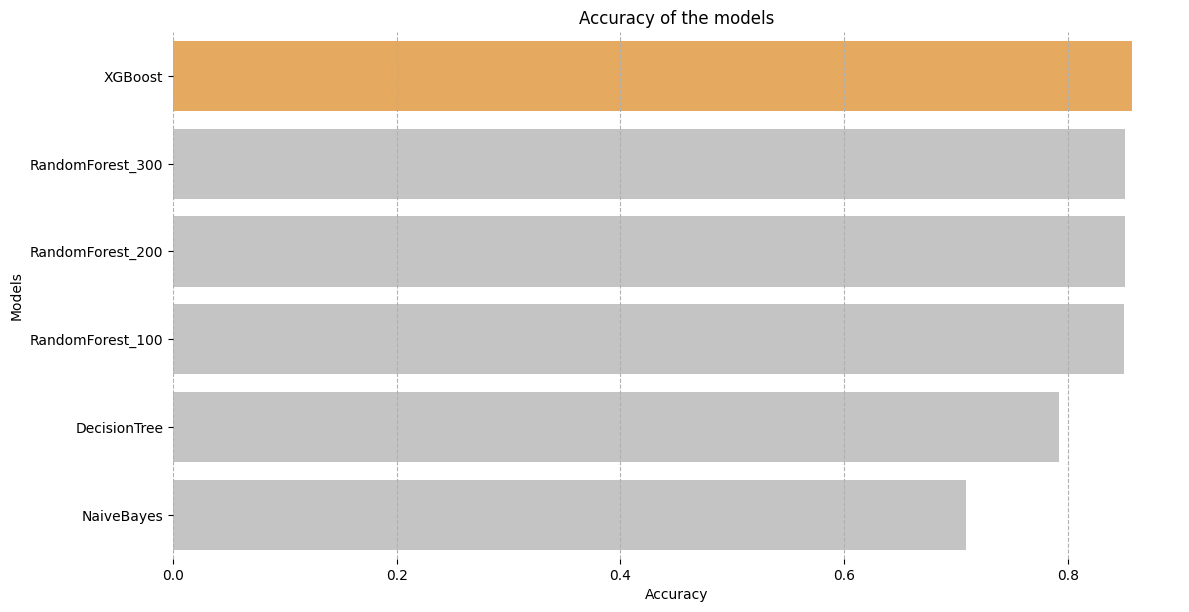

In [20]:
# Display the results
plt.figure(figsize=(12, 6))
sb.barplot(x='accuracy', y='model', data=results, palette= ['#FBAB4A', '#C4C4C4', '#C4C4C4', '#C4C4C4', '#C4C4C4', '#C4C4C4'], capsize=0)
plt.xlabel('Accuracy')
plt.ylabel('Models')
sb.despine(left=True, bottom=True)
plt.grid(axis = 'x', linestyle ='--')
plt.tight_layout()
plt.title('Accuracy of the models')

In [21]:
# Display the results with style
results.style.background_gradient(cmap='Oranges')

,model,accuracy,precision,recall,f1,accuracy_standard_deviation,training_time
0,XGBoost,0.857372,0.803085,0.786940,0.794544,0.008257,0 days 00:00:13.919473
1,RandomForest_300,0.851042,0.810851,0.764234,0.783413,0.005663,0 days 00:00:07.619241
2,RandomForest_200,0.850881,0.809219,0.764238,0.782585,0.006214,0 days 00:00:04.831666
3,RandomForest_100,0.850321,0.807596,0.763431,0.781547,0.005109,0 days 00:00:02.147110
4,DecisionTree,0.791747,0.715643,0.716038,0.715724,0.010427,0 days 00:00:02.132065
5,NaiveBayes,0.708574,0.768228,0.482073,0.471188,0.006750,0 days 00:00:00.116525


`Comment:`  
- XGBoots Outperforms Other Models: After evaluating multiple models with five iterations each, XGBoots consistently demonstrated the highest performance in terms of evaluation metrics.  
- Close Performance between XGBoots and RandomForest (300): While XGBoots emerged as the top performer, RandomForest (300) exhibited comparable performance with a significant advantage in training time, requiring half the time compared to XGBoots.  
- Choosing XGBoots for Prediction: Despite the faster training time of RandomForest (300), the decision was made to utilize XGBoots as the primary model for prediction. This prioritizes the superior performance of XGBoots over training time efficiency.  

## **IV. Build XGBoots Model**

In [22]:
xgboots = XGBClassifier(n_estimators = 100)

In [23]:
xgboots.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
# Predict the data
y_pred = xgboots.predict(X_test)

In [25]:
# Concatenate the predicted data with the actual data
df_pred = pd.DataFrame(
    {
        'Actual': y_test,
        'Predicted': y_pred
    }
)

In [26]:
df_pred.head()

,Actual,Predicted
10290,1,1
2054,1,1
1869,1,1
15278,1,1
11823,1,1


In [27]:
# First way to check the accuracy
print('Accuracy of the model on the test data: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Accuracy of the model on the train data: {:.2f}%'.format(accuracy_score(y_train, xgboots.predict(X_train)) * 100))

Accuracy of the model on the test data: 86.28%
Accuracy of the model on the train data: 95.14%


In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

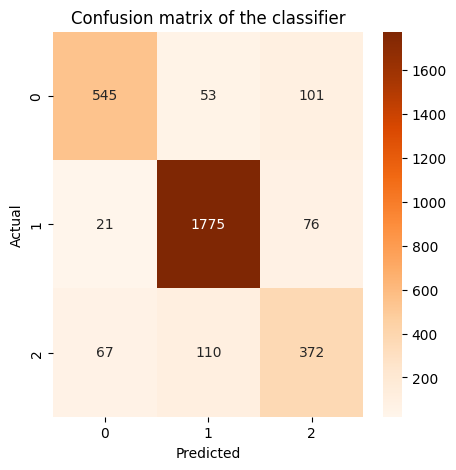

In [29]:
# Convert the confusion matrix to a DataFrame and display it as a heatmap
cm_df = pd.DataFrame(cm, index=xgboots.classes_, columns=xgboots.classes_)
plt.figure(figsize=(5, 5))
plt.title('Confusion matrix of the classifier')
sb.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [30]:
 # Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, xgboots.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       699
           1       0.92      0.95      0.93      1872
           2       0.68      0.68      0.68       549

    accuracy                           0.86      3120
   macro avg       0.82      0.80      0.81      3120
weighted avg       0.86      0.86      0.86      3120



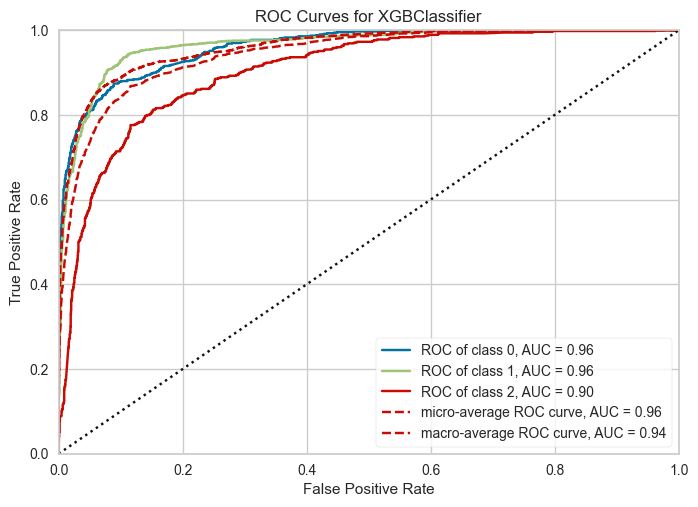

In [31]:
# Use YelloBrick to visualize the AUC of each class
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(xgboots, classes=[0,1,2])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                # Finalize and show the figure

`Comment:`  
- Overall Good Performance of XGBoots: The XGBoots model achieved promising results with high accuracy rates of 95.14% and 86.28% on both the training and test sets.  
- Low Recall for Neutral Class: However, the recall metric for the Neutral class remains a challenge due to data imbalance among the three classes (Positive, Negative, and Neutral). This leads to misclassifications, particularly for the Neutral class, resulting in lower performance metrics for this category.  
- Data Sampling Recommendation: To address the data imbalance and improve overall performance, it is recommended to implement data sampling techniques.

## **V. Using Over Sampling Data**

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [33]:
X_resampled, y_resampled = SMOTE().fit_resample(df_new, data['Label EnCode'])

In [34]:
unique_elements, counts_elements = np.unique(y_resampled, return_counts= True)
print('Frequecy of each category')
print(np.asarray((unique_elements,counts_elements)))

Frequecy of each category
[[   0    1    2]
 [9541 9541 9541]]


In [35]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split( X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [36]:
xgboots_resampled = XGBClassifier(n_estimators = 100)

In [37]:
xgboots_resampled.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [38]:
# Predict the data
y_pred_resampled = xgboots_resampled.predict(X_test_resampled)

In [39]:
# Concatenate the predicted data with the actual data
df_pred_resampled = pd.DataFrame(
    {
        'Actual': y_test_resampled,
        'Predicted': y_pred_resampled
    }
)

In [40]:
df_pred_resampled.head()

,Actual,Predicted
12741,1,1
1660,1,1
96,2,2
24836,2,2
24560,2,2


In [41]:
# First way to check the accuracy
print('Accuracy of the model on the test data: {:.2f}%'.format(accuracy_score(y_test_resampled, y_pred_resampled) * 100))
print('Accuracy of the model on the train data: {:.2f}%'.format(accuracy_score(y_train_resampled, xgboots_resampled.predict(X_train_resampled)) * 100))

Accuracy of the model on the test data: 88.66%
Accuracy of the model on the train data: 95.11%


In [42]:
# Create a confusion matrix
cm = confusion_matrix(y_test_resampled, y_pred_resampled)

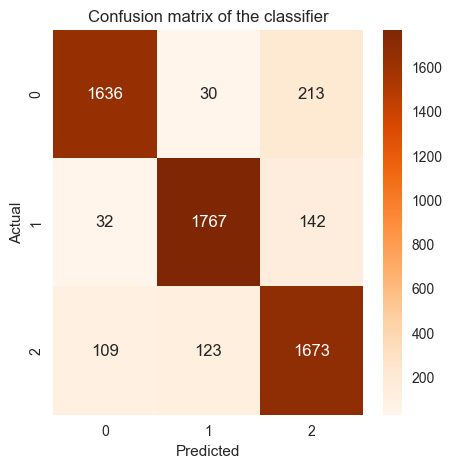

In [43]:
# Convert the confusion matrix to a DataFrame and display it as a heatmap
cm_df = pd.DataFrame(cm, index=xgboots_resampled.classes_, columns=xgboots_resampled.classes_)
plt.figure(figsize=(5, 5))
plt.title('Confusion matrix of the classifier')
sb.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [44]:
print(classification_report(y_test_resampled, xgboots_resampled.predict(X_test_resampled)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1879
           1       0.92      0.91      0.92      1941
           2       0.82      0.88      0.85      1905

    accuracy                           0.89      5725
   macro avg       0.89      0.89      0.89      5725
weighted avg       0.89      0.89      0.89      5725



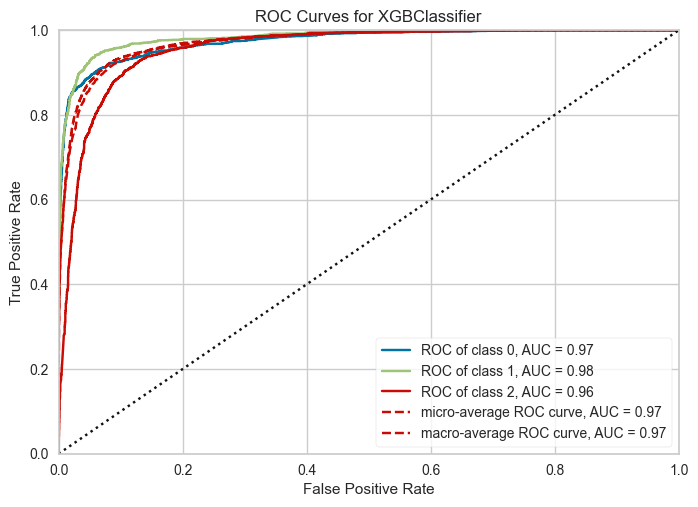

In [45]:
# Use YelloBrick to visualize the AUC of each class
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(xgboots_resampled, classes=[0,1, 2])
visualizer.fit(X_train_resampled, y_train_resampled)        # Fit the training data to the visualizer
visualizer.score(X_test_resampled, y_test_resampled)        # Evaluate the model on the test data
visualizer.show();                # Finalize and show the figure

`Comment:`  
- Over-Sampling Boosts Performance: Implementing data over-sampling techniques led to a significant improvement in the model's performance metrics, including a notable increase in recall.  
- Residual Prediction Errors: Despite the overall performance improvement, a small portion of predictions remains inaccurate, particularly for the Neutral class.  
- Data Collection Recommendation: To further enhance the model's performance and address the remaining prediction errors, it is recommended to dedicate time to collecting additional data samples, specifically focusing on the Negative and Neutral classes. This will provide more data for model training and potentially lead to optimal performance in future predictions.

## **VI. Save Model**

In [46]:
# Save the model
import pickle 

with open('model/xgboots_model.pkl', 'wb') as f:
    pickle.dump(xgboots_resampled, f)

In [47]:
# Load the model
import pickle 

with open('model/xgboots_model.pkl', 'rb') as f:
    model = pickle.load(f)


## **VII. Test Sample** 

In [48]:
test = ['đồ ăn bình thường, giá hơi cao so với thị trường, chờ quá lâu mới nhận được đơn hàng',
        'hương vị dễ dùng, giá cả hợp lí, giao hàng nhanh, lần sau sẽ ủng hộ',
        'đồ ăn không có gì đặc sắc, nhân viên phục vụ hơi cọc',
        'món thịt xiên nướng ở nhà hàng này khá đặc biệt, thịt mềm và thơm, không bị hôi, nói chung giá cả hợp túi tiền']

In [49]:
def enter_your_comment(text):
    #Create df with comment
    df = pd.DataFrame({'Comment' : text})

    # transform data using nlp function
    df['Comment Tokenize'] = df['Comment'].apply(xt.stepByStep)
    
    # tfidf
    X_test = tfidf.transform(df['Comment Tokenize'])
    
    y_pred = model.predict(X_test)

    df['Label'] = y_pred
    df['Label'] = df['Label'].map({0 : 'Negative', 1 : 'Positive', 2: 'Neutral'})
    df = df[['Comment', 'Label']]
    return df

In [50]:
enter_your_comment(test)

,Comment,Label
0,"đồ ăn bình thường, giá hơi cao so với thị trường, chờ quá lâu mới nhận được đơn hàng",Neutral
1,"hương vị dễ dùng, giá cả hợp lí, giao hàng nhanh, lần sau sẽ ủng hộ",Positive
2,"đồ ăn không có gì đặc sắc, nhân viên phục vụ hơi cọc",Negative
3,"món thịt xiên nướng ở nhà hàng này khá đặc biệt, thịt mềm và thơm, không bị hôi, nói chung giá cả hợp túi tiền",Positive
